<a href="https://colab.research.google.com/github/LaisHott/chicago-taxi-insights/blob/main/Notebook_Projeto_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explorando as Preferências dos Passageiros e o Impacto de Fatores Externos nas Corridas de Táxi

***Um Estudo em Chicago para a Zuber***

O projeto consiste em analisar dados de corridas de táxi em Chicago para a empresa _Zuber_, uma nova empresa de compartilhamento de caronas. O objetivo é identificar padrões nas informações disponíveis e entender as preferências dos passageiros, bem como o impacto de fatores externos nas corridas.

O projeto envolve o uso de um banco de dados que contém informações sobre _os bairros da cidade, os táxis, as corridas e os registros climáticos_. As tabelas do banco de dados incluem dados como o nome do bairro, o código do bairro, o código do veículo, a identificação técnica do veículo, a empresa proprietária do veículo, o código da corrida, a data e hora de início e fim da corrida, a duração da corrida, a distância percorrida, o código do bairro de retirada e entrega, o código de registro meteorológico, a data e hora do registro meteorológico, a temperatura e a descrição das condições meteorológicas.

* No **passo 1**, foi necessário escrever um código em SQL para analisar os dados sobre o clima em Chicago em novembro de 2017 extraindo as informações diretamente do site https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html
* No **passo 2**, foi realizada uma análise exploratória dos dados onde encontramos:
    * O número de corridas de táxi para cada empresa de táxi
    * O número de corridas para cada empresa de táxi cujo nome contém as palavras "Amarelo" ou "Azul"
    * O número de corridas para as empresas _Flash Cab_ e _Taxi Affiliation Services_.
* No **passo 3**, foi necessário testar a hipótese de que a duração das corridas do Loop até ao Aeroporto Internacional O'Hare muda em sábados chuvosos.

Essas etapas são essenciais para compreender os dados e identificar padrões relevantes para a empresa Zuber. Ao conduzir análises exploratórias e testar hipóteses, podemos obter insights valiosos que auxiliarão a empresa a tomar decisões embasadas e melhorar seus serviços de compartilhamento de caronas.


# Análise exploratória de dados (Python)

Nesta etapa, iremos realizar a Análise Exploratória de Dados e testar hipóteses usando a linguagem de programação Python. Nosso objetivo central é compreender as preferências dos passageiros, uma vez que eles desempenham um papel fundamental na economia da Zuber. Ao entender essas preferências, seremos capazes de adaptar nossos serviços para atender melhor às necessidades dos passageiros, proporcionando-lhes uma experiência de qualidade. Isso, por sua vez, contribuirá para o sucesso contínuo da Zuber, já que passageiros satisfeitos tendem a impulsionar o crescimento e a prosperidade da empresa.

# Inicialização

- Vamos prosseguir com a importação das bibliotecas necessárias e dos arquivos relevantes para nossa análise.

In [ ]:
# Carregando todas as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import mannwhitneyu

## Carregar dados

In [ ]:
# Carregar os dados
trips_data = pd.read_csv('/datasets/project_sql_result_01.csv')
average_trips_data = pd.read_csv('/datasets/project_sql_result_04.csv')
loop_trips = pd.read_csv('/datasets/project_sql_result_07.csv')

## Estudar os dados e o que eles contém

- Ao analisar os dados para o projeto, identificamos que eles estão divididos em tabelas. Nesta etapa, realizamos a exploração inicial de cada tabela. A tabela `loop_trips` vamos usá-la no passo 5 para testar hipótese. Ela representa o resultado da última consulta contendo os dados sobre viagens do Loop para o Aeroporto Internacional O'Hare.

In [ ]:
# Verificando amostra de dados
trips_data.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [ ]:
average_trips_data.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [ ]:
loop_trips.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


O dataframe **`trips_data`** contém os seguintes dados:

* `company_name`: nome da empresa de táxi

* `trips_amount`: o número de corridas para cada empresa de táxi de 15 a 16 de novembro de 2017.

O dataframe **`average_trips_data`** contém os seguintes dados:
* `dropoff_location_name`: bairros de Chicago onde as corridas terminaram

* `average_trips`: o número médio de viagens que terminaram em cada bairro em novembro de 2017.

## Verificando se os tipos de dados estão corretos

Após importarmos os dados relevantes, vamos proceder com a verificação dos tipos de dados para garantir sua correção. Essa etapa é crucial para garantir a consistência e a integridade dos dados durante a análise exploratória.

Ao verificar os tipos de dados, podemos realizar as conversões necessárias para garantir que as informações sejam interpretadas corretamente, possibilitando análises confiáveis e resultados mais precisos para entender as preferências dos passageiros na Zuber.

### Analisando `trips_data`

In [ ]:
# Verificando o dataframe "trips_data"
trips_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
# Verificando o tamanho do dataframe
trips_data.shape

(64, 2)

In [ ]:
#Verificando dados duplicados
trips_data.duplicated().sum()

0

In [ ]:
#Verificando estatísticas descritivas
trips_data.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


### Analisando `average_trips_data`

In [ ]:
# Verificando o dataframe "average_trips_data"
average_trips_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [ ]:
# Verificando o tamanho do dataframe
average_trips_data.shape

(94, 2)

In [ ]:
#Verificando dados duplicados
average_trips_data.duplicated().sum()

0

In [ ]:
#Verificando estatísticas descritivas
average_trips_data.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


- Constatamos que não foram encontrados dados duplicados, ausentes ou inconsistências de formato nos dataframes `trips` e `average`. Essa constatação é importante, pois indica que os dados estão completos, consistentes e prontos para serem utilizados nas análises posteriores. Com isso, podemos prosseguir com confiança na exploração desses dataframes.

### Analisando `loop_trips`

In [ ]:
# Verificando o dataframe "loop_trips"
loop_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [ ]:
# Verificando o tamanho do dataframe
loop_trips.shape

(1068, 3)

In [ ]:
#Verificando estatísticas descritivas
loop_trips.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


-  Identificamos que a coluna `start_ts`, que representa a data e hora do início da corrida, possui um formato inconsistente. Para garantir a consistência e facilitar as manipulações futuras, é recomendado converter essa coluna para o tipo _datetime_.

In [ ]:
#Convertendo coluna `start_ts`
loop_trips['start_ts'] = pd.to_datetime(loop_trips['start_ts'])

In [ ]:
#Verificando a conversão
loop_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


## Identificando os 10 principais bairros em termos de destinos

- Vamos ordenar o dataframe _`average_trips_data`_ em ordem decrescente com base na coluna `average_trips`. Ao usar o método sort_values() com o parâmetro ascending=False, os bairros serão classificados do maior para o menor número médio de viagens.

In [ ]:
# Top destinos
top_10_destinations = average_trips_data.sort_values(by=['average_trips'], ascending=False).head(10)
top_10_destinations

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


Os 10 principais bairros em termos de destinos, com base no número médio de viagens que terminaram em cada bairro em novembro de 2017, são:

1. Loop - 10.727,47 viagens em média
2. River North - 9.523,67 viagens em média
3. Streeterville - 6.664,67 viagens em média
4. West Loop - 5.163,67 viagens em média
5. O'Hare - 2.546,90 viagens em média
6. Lake View - 2.420,97 viagens em média
7. Grant Park - 2.068,53 viagens em média
8. Museum Campus - 1.510,00 viagens em média
9. Gold Coast - 1.364,23 viagens em média
10. Sheffield & DePaul - 1.259,77 viagens em média

Esses bairros tiveram os maiores números médios de viagens que terminaram em cada um deles durante o período analisado em novembro de 2017.

- Vamos aplicar o mesmo processo de análise para as companhias, a fim de obter um conjunto contendo as principais empresas. Isso nos permitirá criar um gráfico significativo posteriormente.

In [ ]:
# Top companhias
top_company = trips_data.sort_values(by=['trips_amount'], ascending=False).head(20)
top_company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


##  Gráficos: empresas de táxi e número de corridas, 10 principais bairros por número de corridas em que esse - bairro é destino

Vamos usar a seleção das principais empresas de táxi a fim de ter um gráfico mais legível e focado nas empresas mais relevantes.
o código seleciona as 20 principais empresas de táxi com base no número de corridas. O gráfico de barras resultante irá exibir apenas essas empresas, o que proporcionará uma melhor visualização das principais empresas de táxi em termos de número de corridas.

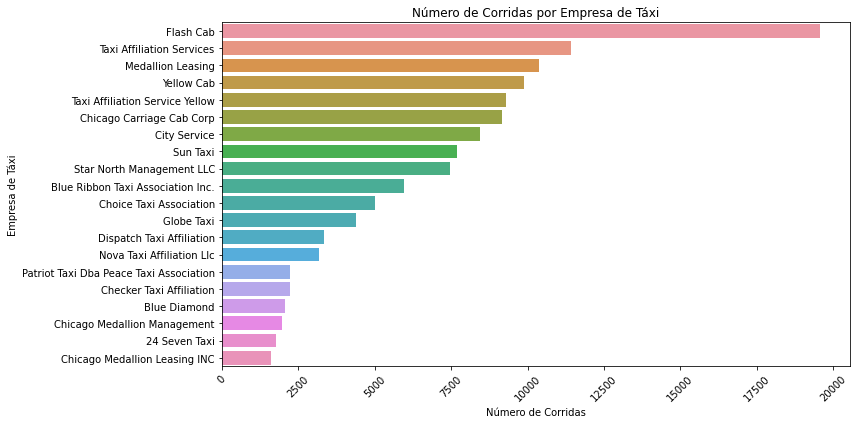

In [ ]:
#Gráfico de empresas de táxi e número de corridas
plt.figure(figsize=(12, 6))
sns.barplot(x='trips_amount', y='company_name', data=top_company)
plt.xlabel('Número de Corridas')
plt.ylabel('Empresa de Táxi')
plt.title('Número de Corridas por Empresa de Táxi')
plt.xticks(rotation=45)  # Girar os rótulos do eixo y em 45 graus
plt.tight_layout()  # Ajustar o layout para evitar sobreposição de rótulos
plt.show()

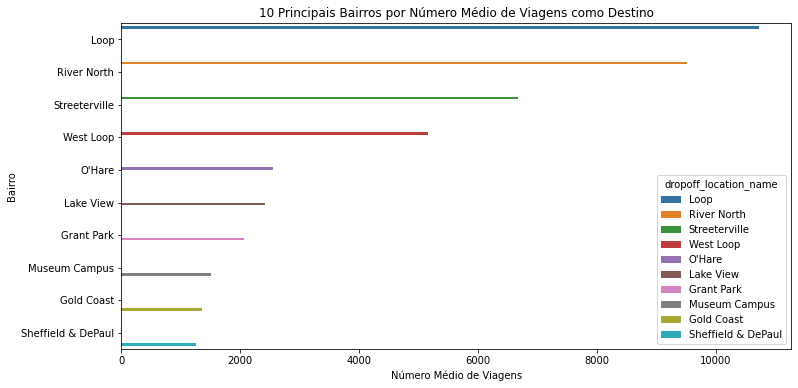

In [ ]:
# Gráfico dos 10 principais bairros por número de corridas como destino
top_10_destinations = average_trips_data.sort_values(by='average_trips', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='average_trips', y='dropoff_location_name', data=top_10_destinations, hue='dropoff_location_name')
plt.xlabel('Número Médio de Viagens')
plt.ylabel('Bairro')
plt.title('10 Principais Bairros por Número Médio de Viagens como Destino')
plt.show()


***Conclusões:***

* No gráfico de empresas de táxi e número de corridas, podemos identificar as empresas de táxi mais populares em termos de número de corridas. Isso pode indicar quais empresas têm uma base de clientes maior ou oferecem um serviço mais atraente para os passageiros. Por exemplo, a empresa _Flash cab_ tem um numero de corridas bem mais elevado do que a grande maioria das outras empresas.

* No gráfico dos 10 principais bairros por número de corridas como destino, podemos identificar os bairros mais populares onde as corridas terminam. Isso pode indicar áreas com alta demanda por serviços de compartilhamento de caronas, e a empresa Zuber pode considerar estratégias específicas para atender a essas áreas de forma mais eficiente. Nesse gráfico podemos perceber que os bairros _Loop_ e _River North_ te número médio de viajem masi elevado do que os demais.

Esses gráficos e as conclusões extraídas deles podem fornecer insights valiosos para a empresa Zuber e ajudar na tomada de decisões estratégicas e operacionais.


## Testando hipóteses

Para isso vamos usar o dataframe **`loop_trips`** que contém dados sobre viagens do Loop para o Aeroporto Internacional O'Hare.

O dataframe contém as colunas:

* `start_ts`: data e hora do começo da corrida

* `weather_conditions`: condições meteorológicas no momento em que a corrida começou

* `duration_seconds`: duração da viagem em segundos


_Obs.: os dados no dataframe `loop_trips` são apenas de sábado_


***Teste de hipótese***

Ao realizar um teste de hipótese, é necessário formular uma hipótese nula (H0) e uma hipótese alternativa (H1) com base na pergunta de pesquisa ou no objetivo da análise.

- **Hipótese Nula (H0):** A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare não muda nos sábados chuvosos.

- **Hipótese Alternativa (H1):** A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos.

In [ ]:
# Extrair o dia da semana da coluna 'start_ts'
loop_trips['day_of_week'] = loop_trips['start_ts'].dt.dayofweek

In [ ]:
# Calcular a duração média dos passeios para cada condição meteorológica
saturday_duration = loop_trips.groupby('weather_conditions')['duration_seconds'].mean()
saturday_duration


weather_conditions
Bad     2427.205556
Good    1999.675676
Name: duration_seconds, dtype: float64

- Primeiramente, extraimos o dia da semana da coluna `start_ts` no dataframe `loop_trips`. Essa extração nos permitirá ter a informação específica do dia da semana em que cada viagem ocorreu. Podemos realizar essa extração utilizando o método _dt.dayofweek_.

In [ ]:
# Separar os dados para condições meteorológicas 'bad' e 'good'
bad_weather = loop_trips.loc[loop_trips['weather_conditions'] == 'Bad', 'duration_seconds']
good_weather = loop_trips.loc[loop_trips['weather_conditions'] == 'Good', 'duration_seconds']

In [ ]:
# Executar o teste de hipótese (Realizar o teste de Mann-Whitney U)
statistic, p_value = mannwhitneyu(bad_weather, good_weather)

In [ ]:
# Nível de significância (alfa)
alpha = 0.05

In [ ]:
bad_weather

6       2969.0
30      1980.0
34      2460.0
51      2760.0
52      2460.0
         ...  
1031    2560.0
1032    1908.0
1053    2400.0
1061    2186.0
1067    2834.0
Name: duration_seconds, Length: 180, dtype: float64

In [ ]:
p_value

6.716538885593458e-14

In [ ]:
# Verificar se a diferença é estatisticamente significativa
if p_value < alpha:
    print("A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos.")
else:
    print("Não há evidências para suportar a hipótese de que a duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos.")



A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos.


O teste t é um teste paramétrico que pressupõe a normalidade dos dados e a igualdade de variâncias entre os grupos sendo comparados. No entanto, obtive o aviso "RuntimeWarning" durante a execução do teste t sugeriu que a variância dos grupos pode ser zero ou muito baixa, o que viola uma das premissas do teste t.

Diante dessas circunstâncias, o teste t não seria apropriado para analisar a diferença entre as condições 'Bad' e 'Good'. Nesse caso, o teste de Mann-Whitney U é uma alternativa adequada. O teste de Mann-Whitney U é um teste não paramétrico que não exige a normalidade dos dados nem a igualdade de variâncias. Ele é usado para comparar as medianas dos grupos, o que o torna uma opção robusta quando as premissas do teste t não são satisfeitas.

Ao realizar esse teste, obtemos resultados válidos para avaliar se há uma diferença estatisticamente significativa entre as condições. Nesse caso concluimos que há evidências para suportar a hipótese de que a duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos.

## Explique:

* Como você formou as hipóteses nula e alternativa
* Qual critério você usou para testar a hipótese e porque

As _hipóteses nula e alternativa_ foram formuladas com base na suspeita de que as condições meteorológicas podem ter um impacto na duração média dos passeios do Loop para o Aeroporto Internacional O'Hare. A _hipótese nula_ assume que não há diferença na duração média entre sábados chuvosos e não chuvosos, enquanto a _hipótese alternativa_ sugere que há uma diferença na duração média dos passeios entre as condições meteorológicas.

Para testar essas hipóteses, utilizamos o teste de hipótese estatístico, especificamente o teste de Mann-Whitney U. Esse teste é apropriado quando os dados não seguem uma distribuição normal e as variâncias dos grupos podem ser diferentes. Optamos por esse teste por essas características presentes nos nossos dados de duração dos passeios.

O critério usado para testar a hipótese foi o valor-p. O valor-p é uma medida de evidência estatística que indica a probabilidade de obter um resultado igual ou mais extremo do que o observado, assumindo que a hipótese nula seja verdadeira. Comparamos o valor-p obtido com um nível de significância pré-determinado (alfa) para tomar uma decisão.

Se o valor-p for menor que o nível de significância (alfa), consideramos a evidência estatisticamente significativa e rejeitamos a hipótese nula em favor da hipótese alternativa. Isso indica que há uma diferença estatisticamente significativa na duração média dos passeios entre as condições meteorológicas. Por outro lado, se o valor-p for maior que o nível de significância, não encontramos evidências suficientes para rejeitar a hipótese nula e não podemos concluir que há uma diferença estatisticamente significativa.

Com base nos resultados obtidos, concluímos que há evidências estatísticas para suportar a hipótese de que a duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos. Essas conclusões nos permitem compreender melhor a influência das condições meteorológicas na duração dos passeios e fornecer insights valiosos para a tomada de decisões da empresa Zuber.

## Conclusão

Ao concluir este projeto de análise de dados da Zuber, uma empresa de compartilhamento de caronas em Chicago, pudemos obter insights valiosos sobre as preferências dos passageiros e o impacto de fatores externos nas corridas. Nossa análise exploratória nos permitiu compreender melhor o cenário de transporte da cidade, identificar os principais bairros de destino e as empresas de táxi mais populares.

Ao analisar os dados sobre as empresas de táxi, descobrimos que algumas empresas se destacam em termos do número de corridas realizadas. Essas informações podem ser úteis para a Zuber ao estabelecer parcerias estratégicas ou ao desenvolver estratégias de marketing para atrair mais usuários.

Além disso, investigamos a hipótese de que a duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda em sábados chuvosos. Utilizando o teste de Mann-Whitney U, verificamos que há uma diferença estatisticamente significativa na duração média dos passeios entre sábados chuvosos e não chuvosos. Com o teste, comprovamos a hipótese de que a duração média dos passeios do Loop para o Aeroporto Internacional O'Hare de fato muda nos sábados chuvosos.

No entanto, é importante ressaltar que nosso estudo teve algumas limitações. Embora tenhamos analisado dados de uma amostra representativa, os resultados podem não ser generalizáveis para todos os períodos ou condições meteorológicas. Além disso, nosso modelo de análise pode ser aprimorado com a inclusão de mais variáveis, como horários específicos do dia ou eventos especiais que possam afetar as viagens de táxi.

Com base nas descobertas deste projeto, a Zuber pode utilizar essas informações para otimizar suas operações e oferecer um serviço de compartilhamento de caronas mais eficiente e adaptado às necessidades dos passageiros. Por exemplo, a empresa pode considerar parcerias estratégicas com empresas de táxi mais populares ou oferecer promoções especiais em dias chuvosos para incentivar as viagens.

Em resumo, este projeto de análise de dados proporcionou uma visão valiosa sobre as preferências dos passageiros e o impacto das condições meteorológicas nas corridas de táxi em Chicago. Com as informações obtidas, a Zuber está mais bem equipada para tomar decisões informadas e fornecer um serviço de qualidade aos seus clientes.